In [36]:
from topologicpy.Vertex import Vertex
from topologicpy.Face import Face
from topologicpy.Cell import Cell
from topologicpy.CellComplex import CellComplex
from topologicpy.Cluster import Cluster
from topologicpy.Topology import Topology
from topologicpy.Dictionary import Dictionary
from topologicpy.Color import Color
from topologicpy.Plotly import Plotly
from topologicpy.Graph import Graph
from topologicpy.Vector import Vector

from topologicpy.Helper import Helper

In [37]:
class Space():
    def __init__(self, name, w, l, h):
        self.name = name
        self.w = w
        self.l = l
        self.h = h
    

In [38]:
general_width = 6.5
general_height = 3.0
corridor_width = 1.0

parking = Space("Parking", general_width, 6, general_height)
living = Space("Living Room", general_width, 7, general_height)
stairs = Space("Stairs", 1.5, 5.5, general_height * 2)
corridor1 = Space("Corridor 1", corridor_width, 5.5, general_height)
patio = Space("Patio", general_width - stairs.w - corridor1.w, stairs.l, general_height*2)
wc1 = Space("WC1", stairs.w, 1.2, general_height)
wc2 = Space("WC2", stairs.w, 1.2, general_height)
service = Space("Service", stairs.w, 2.5, general_height)
dining = Space("Dinning Room", general_width - wc1.w, wc1.l+wc2.l+service.l, general_height)
kitchen = Space("Kitche", 1.8, dining.l, general_height)

corridor2 = Space("Corridor 2", corridor_width, 5.5, general_height)
corridor3 = Space("Corridor 2", general_width, corridor_width, general_height)
corridor4 = Space("Corridor 2", general_width, corridor_width, general_height)
bedroom1 = Space("Room 1", general_width, living.l - corridor3.l, general_height)
bedroom2 = Space("Room 2", general_width, dining.l - corridor3.l, general_height)


In [39]:
has_patio = True
has_bedroom1 = True
has_bedroom2 = True

In [40]:
def getSelectors(cell, keys, values):
    if not cell:
        return None
    # selectors = []
    s = Topology.InternalVertex(cell)
    d = Dictionary.ByKeysValues(keys, values)
    s = Topology.SetDictionary(s, d)
    # selectors.append(s)
    return s

In [41]:
selectors = []
cells = []

parking_tp = Cell.Prism(width=parking.w, length=parking.l, height=parking.h, placement="lowerleft")
selectors.append(getSelectors(parking_tp, ["label", "title"], [0, parking.name]))
cells.append(parking_tp)


living_tp = Cell.Prism(width=living.w, length=living.l, height=living.h, placement="lowerleft")
living_tp = Topology.Translate(living_tp, 0, parking.l, 0)
selectors.append(getSelectors(living_tp, ["label", "title"], [1, living.name]))
cells.append(living_tp)

house = Topology.Boolean(parking_tp, living_tp, operation="merge")

stairs_tp = Cell.Prism(width=stairs.w, length=stairs.l, height=stairs.h, placement="lowerleft")
stairs_tp = Topology.Translate(stairs_tp, 0, parking.l + living.l, 0)
selectors.append(getSelectors(stairs_tp, ["label", "title"], [2, stairs.name]))
cells.append(stairs_tp)
house = Topology.Boolean(house, stairs_tp, operation="merge")

corridor1_tp = Cell.Prism(width=corridor1.w, length=corridor1.l, height=corridor1.h, placement="lowerleft")
corridor1_tp = Topology.Translate(corridor1_tp, stairs.w, parking.l + living.l, 0)
selectors.append(getSelectors(corridor1_tp, ["label", "title"], [3, corridor1.name]))
cells.append(corridor1_tp)

house = Topology.Boolean(house, corridor1_tp, operation="merge")

if has_patio:
    wc1_tp = Cell.Prism(width=wc1.w, length=wc1.l, height=wc1.h, placement="lowerleft")
    wc1_tp = Topology.Translate(wc1_tp, 0, parking.l + living.l + stairs.l, 0)
    selectors.append(getSelectors(wc1_tp, ["label", "title"], [4, wc1.name]))
    cells.append(wc1_tp)
    house = Topology.Boolean(house, wc1_tp, operation="merge")
    
    wc2_tp = Cell.Prism(width=wc2.w, length=wc2.l, height=wc2.h, placement="lowerleft")
    wc2_tp = Topology.Translate(wc2_tp, 0, parking.l + living.l + stairs.l + wc1.l, 0)
    selectors.append(getSelectors(wc2_tp, ["label", "title"], [4, wc2.name]))
    cells.append(wc2_tp)
    
    house = Topology.Boolean(house, wc2_tp, operation="merge")
    
    service_tp = Cell.Prism(width=service.w, length=service.l, height=service.h, placement="lowerleft")
    service_tp = Topology.Translate(service_tp, 0, parking.l + living.l + stairs.l + wc1.l + wc2.l, 0)
    selectors.append(getSelectors(service_tp, ["label", "title"], [5, service.name]))
    cells.append(service_tp)
    house = Topology.Boolean(house, service_tp, operation="merge")

    patio_tp = Cell.Prism(width=patio.w, length=patio.l, height=patio.h, placement="lowerleft")
    patio_tp = Topology.Translate(patio_tp, stairs.w + corridor1.w, parking.l + living.l, 0)
    selectors.append(getSelectors(patio_tp, ["label", "title"], [6, patio.name]))
    cells.append(patio_tp)
    house = Topology.Boolean(house, patio_tp, operation="merge")
    
    dining_tp = Cell.Prism(width=dining.w, length=dining.l, height=dining.h, placement="lowerleft")
    dining_tp = Topology.Translate(dining_tp, wc1.w, parking.l + living.l + stairs.l, 0)
    selectors.append(getSelectors(dining_tp, ["label", "title"], [7, dining.name]))
    cells.append(dining_tp)
    house = Topology.Boolean(house, dining_tp, operation="merge")

    kitchen_tp = Cell.Prism(width=kitchen.w, length=kitchen.l, height=kitchen.h, placement="lowerleft")
    kitchen_tp = Topology.Translate(kitchen_tp, general_width - kitchen.w, parking.l + living.l + stairs.l, 0)
    selectors.append(getSelectors(kitchen_tp, ["label", "title"], [8, kitchen.name]))
    cells.append(kitchen_tp)
    house = Topology.Boolean(house, kitchen_tp, operation="merge")
else:
    dining_tp = Cell.Prism(width=general_width - (stairs.w + corridor1.w), length=stairs.l, height=dining.h, placement="lowerleft")
    dining_tp = Topology.Translate(dining_tp, stairs.w + corridor1.w, parking.l + living.l, 0)
    selectors.append(getSelectors(dining_tp, ["label", "title"], [7, dining.name]))
    cells.append(dining_tp)
    house = Topology.Boolean(house, dining_tp, operation="merge")

    kitchen_tp = Cell.Prism(width=kitchen.w, length=stairs.l, height=kitchen.h, placement="lowerleft")
    kitchen_tp = Topology.Translate(kitchen_tp, general_width - kitchen.w, parking.l + living.l, 0)
    selectors.append(getSelectors(kitchen_tp, ["label", "title"], [8, kitchen.name]))
    cells.append(kitchen_tp)
    house = Topology.Boolean(house, kitchen_tp, operation="merge")

# Second Floor

corridor2_tp = Cell.Prism(width=corridor2.w, length=corridor2.l, height=corridor2.h, placement="lowerleft")
corridor2_tp = Topology.Translate(corridor2_tp, stairs.w, parking.l + living.l, general_height)
selectors.append(getSelectors(corridor2_tp, ["label", "title"], [3, corridor2.name]))
cells.append(corridor2_tp)

house = Topology.Boolean(house, corridor2_tp, operation="merge")

if has_bedroom1:
    corridor3_tp = Cell.Prism(width=corridor3.w, length=corridor3.l, height=corridor3.h, placement="lowerleft")
    corridor3_tp = Topology.Translate(corridor3_tp, 0, parking.l + living.l - corridor3.l, general_height)
    selectors.append(getSelectors(corridor3_tp, ["label", "title"], [3, corridor3.name]))
    cells.append(corridor3_tp)
    
    house = Topology.Boolean(house, corridor3_tp, operation="merge")
    
    bedroom1_tp = Cell.Prism(width=bedroom1.w, length=bedroom1.l, height=bedroom1.h, placement="lowerleft")
    bedroom1_tp = Topology.Translate(bedroom1_tp, 0, parking.l, general_height)
    selectors.append(getSelectors(bedroom1_tp, ["label", "title"], [9, bedroom1.name]))
    cells.append(bedroom1_tp)
    
    house = Topology.Boolean(house, bedroom1_tp, operation="merge")

if has_bedroom2:
    if has_patio:
        corridor4_tp = Cell.Prism(width=corridor4.w, length=corridor4.l, height=corridor4.h, placement="lowerleft")
        corridor4_tp = Topology.Translate(corridor4_tp, 0, parking.l + living.l + corridor2.l, general_height)
        selectors.append(getSelectors(corridor4_tp, ["label", "title"], [3, corridor4.name]))
        cells.append(corridor4_tp)
    
        house = Topology.Boolean(house, corridor4_tp, operation="merge")
    
        bedroom2_tp = Cell.Prism(width=bedroom2.w, length=bedroom2.l, height=bedroom2.h, placement="lowerleft")
        bedroom2_tp = Topology.Translate(bedroom2_tp, 0, parking.l + living.l + patio.l + corridor4.l, general_height)
        selectors.append(getSelectors(bedroom2_tp, ["label", "title"], [9, bedroom2.name]))
        cells.append(bedroom2_tp)
    
        house = Topology.Boolean(house, bedroom2_tp, operation="merge") 


In [42]:
selectors = Helper.Flatten(selectors)
cells = Helper.Flatten(cells)
everything = CellComplex.ByCells(cells)

In [43]:
everything = Topology.TransferDictionariesBySelectors(everything, selectors, tranCells=True)
g = Graph.ByTopology(everything)
graph_data = Plotly.DataByGraph(g, vertexSize=4, vertexGroupKey="label", vertexLabelKey="title", vertexGroups=[0,1,2,3,4,5,6,7,8,9])
bldg_data = Plotly.DataByTopology(everything, faceOpacity=0.5, edgeColor="lightgrey", vertexColor="lightgrey")
fig = Plotly.FigureByData(graph_data+bldg_data)
Plotly.Show(fig)

In [35]:
Graph.ExportToCSV(g, "./data", 0, overwrite=True)

True

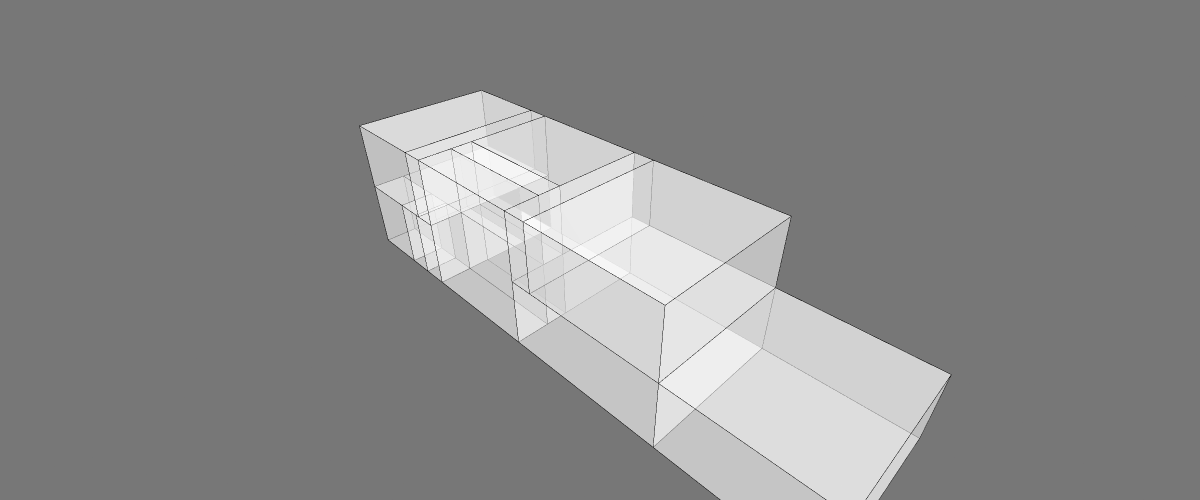

In [34]:
Topology.Show(house, renderer='jupyterlab', showVertices=False, faceColor="#FFFFFF", backgroundColor="#777777")